In [146]:
import pandas as pd
from datasets import load_dataset
import os
os.chdir('/Users/markjos/projects/malachor5')
import numpy as np
from typing import Literal
from tqdm import tqdm
import sys
from glob import glob

sys.path.append('scripts')
from longform import load_and_resample

In [70]:
longform_csv_path = '../../data/elicitation-wavs/autotranscribed/metadata.csv'
df = pd.read_csv(longform_csv_path, index_col=0, keep_default_na=False)
df.head()

,wav_path,tier_name,start,end,transcription,eaf_path,wav_source,sli_pred
0,,asr,30,1414,"Hello, hello, hello.",/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,ENG
1,,asr,2106,4755,"Hello, hello, hello, hello, hello.",/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,ENG
2,,asr,6240,8502,"Hello, hello. This shit.",/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,ENG
3,,asr,8535,8569,...,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,ENG
4,,asr,8721,11269,Hello. Hello. Hello.,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,ENG


In [71]:
df[df['sli_pred']=='TIC']

,wav_path,tier_name,start,end,transcription,eaf_path,wav_source,sli_pred
213,,asr,902522,907804,àprí və́lɛ̀ðɛ̀ və́lɛ̀ðɛ̀ jàvə́lɛ̀ðɛ̀,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,TIC
402,,asr,1649663,1652329,ðà ɔ́ɟɔ́ və́lɛ̀ðɛ̀ ùnɛ́ɾɛ̀,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,TIC
451,,asr,1807782,1809250,nd̪ɔ̀bàgɛ̀,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,TIC
461,,asr,1858373,1859352,nd̪ɔ̀bàgɛ̀,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,TIC
476,,asr,1920844,1922802,án ɔ́ɟɔ́ kávə̀lɛ̀ðɔ́ nd̪ɔ̀bàgɛ̀,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,TIC
...,...,...,...,...,...,...,...,...
515,,asr,2278257,2280822,àń ndɔ́n káɾògɛ́ àprí ðɔ̀ndɔ̀ðɔ̀ ídɔ̀t̪...,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,TIC
528,,asr,2331059,2332358,làgɛ́ðà ǹdɔ̀dɔ̀ t̪ɛ̀lúbú,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,TIC
567,,asr,2469434,2470682,ðɛ̀bùltì,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,TIC
575,,asr,2498762,2500804,ðə́və̀ɽá ðɛ́r ívè,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,TIC


In [72]:
asr_csv_path = '../../data/hf-datasets/tira-clean/metadata.csv'
asr_df = pd.read_csv(asr_csv_path, index_col=0, keep_default_na=False)
asr_df.head()

,start,end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,file_name,path,...,trans_len_sq,trans_len_log,cos_sim_softmax,cos_sim_log,duration,split,croatian,croatian_nmzd,tira_transliterated,tira_transliterated_ids
0,2497647.0,2498747.0,lə̀və̀lɛ̀ðɛ́l únɛ̀ɾɛ̀,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,lə̀və̀lɛ̀ðɛ́l únɛ̀ɾɛ̀,data/tira-asr/clips/HH20210305-m41s37ms647-m41...,/Users/markjos/Library/CloudStorage/GoogleDriv...,clips/HH20210305-m41s37ms647-m41s38ms747.wav,HH20210305-m41s37ms647-m41s38ms747.wav,...,3.091042,3.091042,0.000050,-9.912789,1.100,train,Ljubav.,ljubav,le valideluna re,"[50258, 50291, 50360, 50364, 476, 7363, 338, 5..."
1,2325216.0,2326306.0,kə̀ŋàcîí,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,kə̀ŋàtʃîːí,data/tira-asr/clips/HH20210707-m38s45ms216-m38...,/Users/markjos/Library/CloudStorage/GoogleDriv...,clips/HH20210707-m38s45ms216-m38s46ms306.wav,HH20210707-m38s45ms216-m38s46ms306.wav,...,2.397895,2.397895,0.000049,-9.925062,1.090,test,k'n'a Či,kna či,correctik j,"[50258, 50291, 50360, 50364, 3006, 1035, 361, ..."
2,354974.0,356382.0,ŋ̀gátɛ́və́lɛ̂ðɔ́ nd̪ɔ̀bàgɛ̀,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,ŋ̀gáʈɛ́və́lɛ̂ðɔ́ nd̪ɔ̀bàgɛ̀,data/tira-asr/clips/HH02192021-m05s54ms974-m05...,/Users/markjos/Library/CloudStorage/GoogleDriv...,clips/HH02192021-m05s54ms974-m05s56ms382.wav,HH02192021-m05s54ms974-m05s56ms382.wav,...,3.367296,3.367296,0.000049,-9.927990,1.408,train,Ndati je vjerojatno.,ndati je vjerojatno,neg aa tealedondobace,"[50258, 50291, 50360, 50364, 2485, 40079, 535,..."
3,154905.0,157215.0,ŋɔ́ðɔ́ ŋá və́lɛ̀ðà ðàŋàlà nd̪ɔ̀bà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,ŋɔ́ðɔ́ ŋá və́lɛ̀ðà ðàŋàlà nd̪ɔ̀bà,data/tira-asr/clips/HH20231104-m02s34ms905-m02...,/Users/markjos/Library/CloudStorage/GoogleDriv...,clips/HH20231104-m02s34ms905-m02s37ms215.wav,HH20231104-m02s34ms905-m02s37ms215.wav,...,3.663562,3.663562,0.000049,-9.928527,2.310,train,"Ngovo, ngavel je da zanadam toba.",ngovo ngavel je da zanadam toba,ingovongaaailedha va malantoba,"[50258, 50291, 50360, 50364, 18459, 85, 556, 2..."
4,2311065.0,2312385.0,ðə̀və̀lèðɔ̀ŋ,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,ðə̀və̀lèðɔ̀ŋ,data/tira-asr/clips/HH02192021-m38s31ms065-m38...,/Users/markjos/Library/CloudStorage/GoogleDriv...,clips/HH02192021-m38s31ms065-m38s32ms385.wav,HH02192021-m38s31ms065-m38s32ms385.wav,...,2.564949,2.564949,0.000049,-9.929410,1.320,train,zvlezom.,zvlezom,be volevo ng,"[50258, 50291, 50360, 50364, 650, 49877, 3080,..."


In [73]:
asr_df=asr_df.reset_index(names='asr_index')
asr_df['tier_name']='human_label'
asr_df['eaf_path']=asr_df['eaf_source']
asr_df['sli_pred']=np.nan

df['asr_index']=np.nan
df['split']=np.nan
del df['wav_path']

merged_df = pd.concat([df, asr_df[df.columns]], ignore_index=True)
print(merged_df.shape)
merged_df.head()

(129873, 9)


,tier_name,start,end,transcription,eaf_path,wav_source,sli_pred,asr_index,split
0,asr,30.0,1414.0,"Hello, hello, hello.",/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,ENG,NaN,NaN
1,asr,2106.0,4755.0,"Hello, hello, hello, hello, hello.",/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,ENG,NaN,NaN
2,asr,6240.0,8502.0,"Hello, hello. This shit.",/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,ENG,NaN,NaN
3,asr,8535.0,8569.0,...,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,ENG,NaN,NaN
4,asr,8721.0,11269.0,Hello. Hello. Hello.,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/home/AD/mjsimmons/datasets/elicitation-wavs/m...,ENG,NaN,NaN


In [74]:
merged_df[merged_df['tier_name']=='human_label']

,tier_name,start,end,transcription,eaf_path,wav_source,sli_pred,asr_index,split
109393,human_label,2497647.0,2498747.0,lə̀və̀lɛ̀ðɛ́l únɛ̀ɾɛ̀,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,NaN,0.0,train
109394,human_label,2325216.0,2326306.0,kə̀ŋàcîí,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,NaN,1.0,test
109395,human_label,354974.0,356382.0,ŋ̀gátɛ́və́lɛ̂ðɔ́ nd̪ɔ̀bàgɛ̀,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,NaN,2.0,train
109396,human_label,154905.0,157215.0,ŋɔ́ðɔ́ ŋá və́lɛ̀ðà ðàŋàlà nd̪ɔ̀bà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,NaN,3.0,train
109397,human_label,2311065.0,2312385.0,ðə̀və̀lèðɔ̀ŋ,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,NaN,4.0,train
...,...,...,...,...,...,...,...,...,...
129868,human_label,1005320.0,1007400.0,ðá nɛ́lê və̀lɛ̀ðɔ́ nd̪ɔ̀bà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,NaN,20475.0,train
129869,human_label,997005.0,997694.0,ŋə̀vrà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,NaN,20476.0,test
129870,human_label,1121405.0,1122391.0,ŋə̀búrŋɛ̀ ánó,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,NaN,20477.0,train
129871,human_label,1050093.0,1051320.0,lá vŕðìt̪ɔ̀ kukuŋu ðɛdɔɽɔ,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,NaN,20478.0,train


In [75]:
merged_df.loc[merged_df['wav_source'].isna(), 'tier_name'].unique()

array([], dtype=object)

In [76]:
merged_df['filestem']=merged_df['eaf_path'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])
merged_df['filestem']

0           HH01082021
1           HH01082021
2           HH01082021
3           HH01082021
4           HH01082021
              ...     
129868      HH20230516
129869    HH08212020-2
129870      HH20230626
129871      HH20240308
129872      HH20210707
Name: filestem, Length: 129873, dtype: object

# Group annotations
- For each recording
  - Sort labels by start time
  - For each human label in recording
    - Assign rows to the label by associating preceding or following machine labels to the human label
    - Associate rows by setting the `asr_index` col for each machine label to the matching human label
    - Stop when adding another label would make the label >30s or when another `in_dataset` or `human_label` row is reached
    - Whenever a label is added, set the column for `in_dataset` to True
- Write a function to 

In [77]:
def associate_machine_labels(df: pd.DataFrame):
        df=df.sort_values('start')
        def map_asr_indices(row: pd.Series):
            start = row['start']
            end = row['end']
            
            add_direction: Literal['prev', 'next'] = 'prev'
            last_index_added = None
            # while there are still rows in the asr labels that have not been associated with a human label
            # and the time window is less than 30 seconds
            # associate last index added with human label
            while (end-start) < 30_000:
                if last_index_added is not None:
                    df.at[last_index_added, 'asr_index'] = row['asr_index']
                    df.at[last_index_added, 'split'] = row['split']

                prev_rows = df[df['end']<=start]
                next_rows = df[df['start']>=end]
                if len(prev_rows)==0 or not np.isnan(prev_rows.iloc[-1]['asr_index']):
                    prev_rows=None
                if len(next_rows)==0 or not np.isnan(next_rows.iloc[0]['asr_index']):
                    next_rows=None
                if (prev_rows is None) and (next_rows is None):
                    break
                if next_rows is not None and (add_direction == 'next' or prev_rows is None):
                    end = next_rows.iloc[0]['end']
                    add_direction = 'prev'
                    last_index_added = next_rows.iloc[0].name
                else: # next_rows is None or add_direction == 'prev':
                    start = prev_rows.iloc[-1]['start']
                    add_direction = 'next'
                    last_index_added = prev_rows.iloc[-1].name
        df[df['tier_name']=='human_label'].apply(map_asr_indices, axis=1)
        return df

In [78]:
merged_df['prev_human_label']=np.nan
merged_df['next_human_label']=np.nan
for file in tqdm(merged_df['filestem'].unique().tolist()):
    is_file = merged_df['filestem']==file
    merged_df.loc[is_file]=associate_machine_labels(merged_df[is_file])

100%|██████████| 184/184 [01:11<00:00,  2.58it/s]


In [79]:
(~merged_df['asr_index'].isna()).sum(), (merged_df['asr_index'].isna()).sum(), merged_df['tier_name'].value_counts()

(74835,
 55038,
 tier_name
 asr            109393
 human_label     20480
 Name: count, dtype: int64)

In [140]:
def make_long_labels(df):
    long_labels = []
    for i in tqdm(df['asr_index'].unique().tolist()):
        if np.isnan(i):
            continue
        has_index = df['asr_index']==i
        min_start = df[has_index]['start'].min()
        max_end = df[has_index]['end'].max()
        transcription = ' '.join([
            s.strip() for s in df[has_index].sort_values('start')['transcription']
        ]).strip()
        filestem = df[has_index]['filestem'].iloc[0]
        split = df[has_index]['split'].iloc[0]
        long_labels.append({
            'asr_index': i,
            'start': min_start,
            'end': max_end,
            'transcription': transcription,
            'indices': df[has_index].sort_values('start').index.tolist(),
            'duration': max_end-min_start,
            'split': split,
            'filestem': filestem,
        })
    return pd.DataFrame(long_labels)

In [141]:
long_labels_df = make_long_labels(merged_df)
print(f"{long_labels_df.shape=}")
long_labels_df.head()

100%|██████████| 20481/20481 [00:48<00:00, 424.91it/s]


long_labels_df.shape=(20480, 8)


,asr_index,start,end,transcription,indices,duration,split,filestem
0,8210.0,74415.0,102445.0,"What? You're a stripper? Alright, so here... E...","[19, 20, 21, 22, 117603, 23, 24, 25, 26]",28030.0,validation,HH01082021
1,11229.0,105710.0,117008.0,"kə̀cə̀lò I can't hear it. Hey, that is attitu...","[120622, 27, 28, 29]",11298.0,validation,HH01082021
2,5569.0,119245.0,146843.0,ìjɔ̀ kə̀cə̀lò I'm not hearing an item at the...,"[114962, 30, 31, 32, 33, 34, 35]",27598.0,validation,HH01082021
3,2709.0,147480.0,152378.0,àprì up three.,"[112102, 36]",4898.0,test,HH01082021
4,19391.0,152780.0,166199.0,àprí jə̀cə̀lò So that went as a year. Is th...,"[128784, 37, 38, 39, 40]",13419.0,validation,HH01082021


In [104]:
print(f"avg duration: {long_labels_df['duration'].mean()/1_000:.2f}s")
print(f"total duration: {long_labels_df['duration'].sum()/(1_000*60*60):.2f}hr")
for split in long_labels_df['split'].unique():
    split_df = long_labels_df[long_labels_df['split']==split]
    print(f"total duration {split}: {split_df['duration'].sum()/(1_000*60*60):.2f}hr")    
    print(f"avg duration {split}: {split_df['duration'].mean()/1_000:.2f}s")


avg duration: 12.08s
total duration: 68.70hr
total duration validation: 8.03hr
avg duration validation: 14.12s
total duration test: 7.97hr
avg duration test: 14.00s
total duration train: 52.70hr
avg duration train: 11.58s


<Axes: >

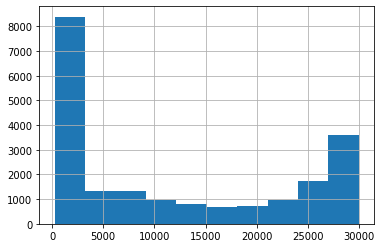

In [105]:
long_labels_df['duration'].hist()

In [150]:
elicitation_wavs = glob('data/elicitation-wavs/wav/*')
elicitation_eafs = glob('data/elicitation-wavs/autotranscribed/*.eaf')

In [ ]:
filestem_to_paths = {}
for wav in elicitation_wavs:
    filestem = os.path.splitext(os.path.basename(wav))[0]
    filestem_to_paths[filestem] = {'wav': wav} 


In [153]:
get_wav_with_filestem = lambda fs: filestem_to_paths[fs]['wav']
get_eaf_with_filestem = lambda fs: filestem_to_paths[fs]['eaf']
long_labels_df['wav_source'] = long_labels_df['filestem'].apply(get_wav_with_filestem)

In [155]:
long_labels_df.to_csv('data/elicitation-wavs/long_labels.csv', index=False)

# Long labels HF dataset
Make a new folder, save `long_labels_df`, snip and move all wavs

In [111]:
'/Users/markjos/projects/malachor5/data/elicitation-wavs/wav'
long_labels_df['wav_source_mac'] = long_labels_df['wav_source'].apply(lambda x: x.replace(
    '/home/AD/mjsimmons/datasets/elicitation-wavs/masked/',
    '/Users/markjos/projects/malachor5/data/elicitation-wavs/wav/'
))
for wav_path in long_labels_df['wav_source_mac'].unique():
    if not os.path.exists(wav_path):
        print(wav_path)

In [120]:
del long_labels_df['wav_source']
long_labels_df = long_labels_df.rename({'wav_source_mac': 'wav_source'}, axis=1)
long_labels_df

,asr_index,start,end,transcription,indices,duration,split,eaf_path,wav_source
0,8210.0,74415.0,102445.0,"What? You're a stripper? Alright, so here... E...","[19, 20, 21, 22, 117603, 23, 24, 25, 26]",28030.0,validation,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/Users/markjos/projects/malachor5/data/elicita...
1,11229.0,105710.0,117008.0,"kə̀cə̀lò I can't hear it. Hey, that is attitu...","[120622, 27, 28, 29]",11298.0,validation,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/Users/markjos/projects/malachor5/data/elicita...
2,5569.0,119245.0,146843.0,ìjɔ̀ kə̀cə̀lò I'm not hearing an item at the...,"[114962, 30, 31, 32, 33, 34, 35]",27598.0,validation,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/Users/markjos/projects/malachor5/data/elicita...
3,2709.0,147480.0,152378.0,àprì up three.,"[112102, 36]",4898.0,test,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/Users/markjos/projects/malachor5/data/elicita...
4,19391.0,152780.0,166199.0,àprí jə̀cə̀lò So that went as a year. Is th...,"[128784, 37, 38, 39, 40]",13419.0,validation,/home/AD/mjsimmons/datasets/elicitation-wavs/a...,/Users/markjos/projects/malachor5/data/elicita...
...,...,...,...,...,...,...,...,...,...
20475,20470.0,1256526.0,1257592.0,ŋàmɽárè,[129863],1066.0,test,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...
20476,20471.0,1261946.0,1262962.0,ŋə̀mìɲàt̪ɔ́ ásá,[129864],1016.0,test,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...
20477,20475.0,1005320.0,1007400.0,ðá nɛ́lê və̀lɛ̀ðɔ́ nd̪ɔ̀bà,[129868],2080.0,train,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...
20478,20477.0,1121405.0,1122391.0,ŋə̀búrŋɛ̀ ánó,[129870],986.0,train,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...


In [124]:
long_labels_df.to_csv('data/elicitation-wavs/autotranscribed/longlabels.csv', index=False)

In [157]:
ds = load_dataset('audiofolder', data_dir='data/hf-datasets/tira-longlabels')

Resolving data files: 100%|██████████| 20481/20481 [00:00<00:00, 242869.82it/s]
Extracting data files: 0it [00:00, ?it/s]
Generating train split: 20480 examples [00:03, 6596.79 examples/s]


In [158]:
ds

DatasetDict({
    train: Dataset({
        features: ['audio', 'asr_index', 'start', 'end', 'transcription', 'indices', 'duration', 'split', 'filestem', 'wav_source'],
        num_rows: 20480
    })
})